In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nicolehoelzl/mpii-human-pose-data")

print("Path to dataset files:", path)

C:\Users\vishw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\vishw\.cache\kagglehub\datasets\nicolehoelzl\mpii-human-pose-data\versions\1


In [1]:
import pandas as pd

kp = pd.read_csv('./mpii_human_pose_v1_u12_2/mpii_human_pose.csv')
kp.head(4)

,ID,NAME,r ankle_X,r ankle_Y,r knee_X,r knee_Y,r hip_X,r hip_Y,l hip_X,l hip_Y,...,r shoulder_Y,l shoulder_X,l shoulder_Y,l elbow_X,l elbow_Y,l wrist_X,l wrist_Y,Scale,Activity,Category
0,1,015601864.jpg,620,394,616,269,573,185,647,188,...,167,692,185,693,240,688,313,3.021046,curling,sports
1,2,015599452.jpg,-1,-1,-1,-1,806,543,720,593,...,281,719,299,711,516,545,466,5.641276,curling,sports
2,3,005808361.jpg,804,711,816,510,908,438,1040,454,...,253,1067,253,1167,353,1142,478,4.718488,curling,sports
3,4,086617615.jpg,301,461,305,375,201,340,294,342,...,261,314,264,327,320,362,346,2.681349,curling,sports


In [2]:
kp.isna().sum()

ID              0
NAME            0
r ankle_X       0
r ankle_Y       0
r knee_X        0
r knee_Y        0
r hip_X         0
r hip_Y         0
l hip_X         0
l hip_Y         0
l knee_X        0
l knee_Y        0
l ankle_X       0
l ankle_Y       0
pelvis_X        0
pelvis_Y        0
thorax_X        0
thorax_Y        0
upper neck_X    0
upper neck_Y    0
head top_X      0
head top_Y      0
r wrist_X       0
r wrist_Y       0
r elbow_X       0
r elbow_Y       0
r shoulder_X    0
r shoulder_Y    0
l shoulder_X    0
l shoulder_Y    0
l elbow_X       0
l elbow_Y       0
l wrist_X       0
l wrist_Y       0
Scale           0
Activity        0
Category        0
dtype: int64

In [3]:
kp.keys()

Index(['ID', 'NAME', 'r ankle_X', 'r ankle_Y', 'r knee_X', 'r knee_Y',
       'r hip_X', 'r hip_Y', 'l hip_X', 'l hip_Y', 'l knee_X', 'l knee_Y',
       'l ankle_X', 'l ankle_Y', 'pelvis_X', 'pelvis_Y', 'thorax_X',
       'thorax_Y', 'upper neck_X', 'upper neck_Y', 'head top_X', 'head top_Y',
       'r wrist_X', 'r wrist_Y', 'r elbow_X', 'r elbow_Y', 'r shoulder_X',
       'r shoulder_Y', 'l shoulder_X', 'l shoulder_Y', 'l elbow_X',
       'l elbow_Y', 'l wrist_X', 'l wrist_Y', 'Scale', 'Activity', 'Category'],
      dtype='object')

In [8]:
import matplotlib.pyplot as plt
import cv2
import random

def visualize_image_with_keypoints(idx):
    # Read and convert image
    image = cv2.imread(f'./images/{kp["NAME"][idx]}')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Define keypoints
    keypoints = {
        'r_ankle': (int(kp['r ankle_X'][idx]), int(kp['r ankle_Y'][idx])),
        'r_knee': (int(kp['r knee_X'][idx]), int(kp['r knee_Y'][idx])),
        'r_hip': (int(kp['r hip_X'][idx]), int(kp['r hip_Y'][idx])),
        'l_ankle': (int(kp['l ankle_X'][idx]), int(kp['l ankle_Y'][idx])),
        'l_knee': (int(kp['l knee_X'][idx]), int(kp['l knee_Y'][idx])),
        'l_hip': (int(kp['l hip_X'][idx]), int(kp['l hip_Y'][idx])),
        'pelvis': (int(kp['pelvis_X'][idx]), int(kp['pelvis_Y'][idx])),
        'thorax': (int(kp['thorax_X'][idx]), int(kp['thorax_Y'][idx])),
        'upper_neck': (int(kp['upper neck_X'][idx]), int(kp['upper neck_Y'][idx])),
        'head_top': (int(kp['head top_X'][idx]), int(kp['head top_Y'][idx])),
        'r_wrist': (int(kp['r wrist_X'][idx]), int(kp['r wrist_Y'][idx])),
        'r_elbow': (int(kp['r elbow_X'][idx]), int(kp['r elbow_Y'][idx])),
        'r_shoulder': (int(kp['r shoulder_X'][idx]), int(kp['r shoulder_Y'][idx])),
        'l_wrist': (int(kp['l wrist_X'][idx]), int(kp['l wrist_Y'][idx])),
        'l_elbow': (int(kp['l elbow_X'][idx]), int(kp['l elbow_Y'][idx])),
        'l_shoulder': (int(kp['l shoulder_X'][idx]), int(kp['l shoulder_Y'][idx]))
    }
    
    # Define connections for skeleton
    connections = [
        ('head_top', 'upper_neck'),
        ('upper_neck', 'thorax'),
        ('thorax', 'pelvis'),
        ('thorax', 'r_shoulder'),
        ('thorax', 'l_shoulder'),
        ('r_shoulder', 'r_elbow'),
        ('r_elbow', 'r_wrist'),
        ('l_shoulder', 'l_elbow'),
        ('l_elbow', 'l_wrist'),
        ('pelvis', 'r_hip'),
        ('pelvis', 'l_hip'),
        ('r_hip', 'r_knee'),
        ('r_knee', 'r_ankle'),
        ('l_hip', 'l_knee'),
        ('l_knee', 'l_ankle')
    ]
    # Draw keypoints
    for point in keypoints.values():
        if point[0] != -1 and point[1] != -1:  # Only draw if keypoint exists
            cv2.circle(image, center=point, radius=5, color=(255, 0, 0), thickness=-1)
    # Draw connections
    i = 0
    while i < len(connections):
        start_point = keypoints[connections[i][0]]
        end_point = keypoints[connections[i][1]]
        # Check if both points exist (not -1)
        if (start_point[0] != -1 and start_point[1] != -1 and 
            end_point[0] != -1 and end_point[1] != -1):
            cv2.line(image, 
                    (start_point[0], start_point[1]), 
                    (end_point[0], end_point[1]), 
                    color=(random.randint(0,255),random.randint(0,255),random.randint(0,255)), 
                    thickness=2)
        i += 1
    
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Image: {kp["NAME"][idx]} - Activity: {kp["Activity"][idx]}')
    plt.show()


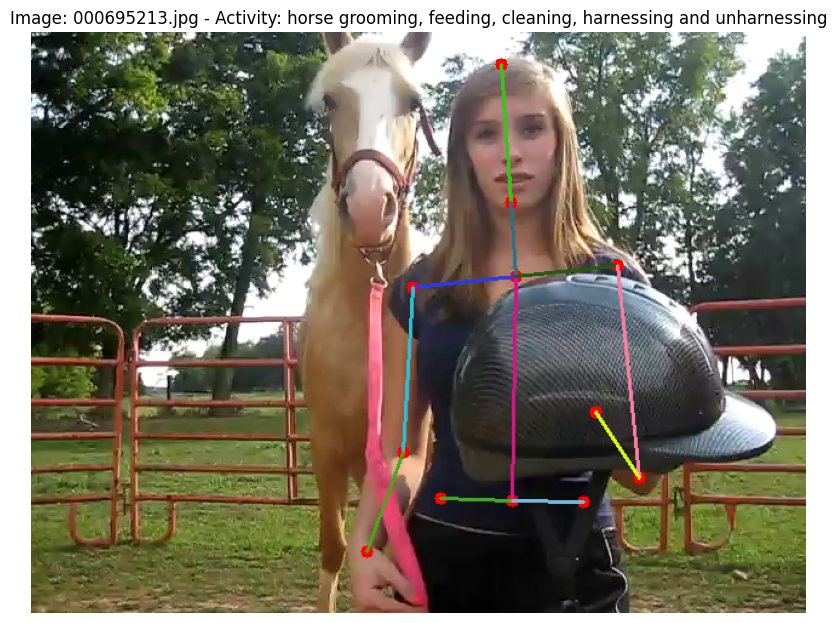

In [10]:
visualize_image_with_keypoints(100)